# Libraries

In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

# Data Import

In [2]:
os.getcwd()

df = pd.read_csv("Data+for+TreefortBnB+Puzzle.csv")

In [3]:
df.head()

,Unique id,City,State,$ Price,# of Reviews
0,1,Portland,OR,75,5
1,2,San Diego,CA,95,3
2,3,New York,NY,149,37
3,4,Los Angeles,CA,199,45
4,5,Denver,CO,56,99


# Data Wrangling

## Clean column names

In [4]:
print(df.columns)

col_names = (
    "id",
    "city",
    "state",
    "price_usd",
    "num_reviews",
)

df.columns = col_names
print(df.columns)

Index(['Unique id', 'City', 'State', '$ Price', '# of Reviews'], dtype='object')
Index(['id', 'city', 'state', 'price_usd', 'num_reviews'], dtype='object')


## Check for missing values

False	id
False	city
False	state
False	price_usd
False	num_reviews


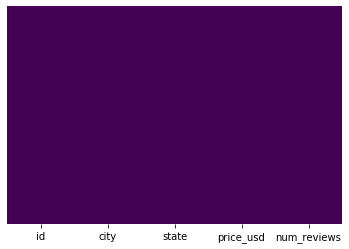

In [5]:
## Visual check
sns.heatmap(
    df.isnull(),
    yticklabels = False,
    cbar = False,
    cmap = 'viridis'
)

## check each column for missing values
for col in df.columns:
    are_null = df[[col]].isnull().values.any()
    print(are_null, col, sep = "\t")

## Check data types

In [6]:
df.dtypes

id              int64
city           object
state          object
price_usd       int64
num_reviews     int64
dtype: object

## Clean string data

In [7]:
## Uniform case & strip excess white space
df['city'] = df['city'].str.title().str.strip()
df['state'] = df['state'].str.upper().str.strip()
    
df.head()

,id,city,state,price_usd,num_reviews
0,1,Portland,OR,75,5
1,2,San Diego,CA,95,3
2,3,New York,NY,149,37
3,4,Los Angeles,CA,199,45
4,5,Denver,CO,56,99


# Analysis

## 100 cities w/ most units on market

In [14]:
"""
1. Group by city, then state. Select price column
2. Describe for characteristics of data set
3. Sort values by count, in descending order
4. Take top 100 values, and the median column
5. Convert back to dataframe
6. Rename median column
7. Sort values based on median price USD
"""
df_top_cities = df \
    .groupby( ['city', 'state'])['price_usd'] \
    .describe() \
    .sort_values( 'count', ascending = False) \
    .head(100)['50%'] \
    .to_frame() \
    .rename( columns = { '50%' : 'median_price_usd'}) \
    .sort_values( 'median_price_usd', ascending = False)


df_top_cities.head()

,,median_price_usd
city,state,
Indianapolis,IN,650.0
Malibu,CA,304.0
Park City,UT,299.0
Healdsburg,CA,275.0
Truckee,NV,275.0


In [ ]:
pd.set_option('display.max_rows', None)
df_top_cities.info

# Exploratory analysis

In [ ]:
## Check descriptive statistics for price_usd
df['price_usd'].describe()

- Max price is $10,000

- Quantile 3 is $200

Something strange here that needs more exploring.

In [ ]:
df['price_usd'].hist(
    bins = 50,
    figsize = (15, 10),
    log = True    # to veiw data
)

Histogram shows that there are units listed above $2,000.

Additionally, there are units listed at $10,000.


In [ ]:
## Filter rows > 4000
expensive_cities = df[df['price_usd'] > 4000] \
    .sort_values('price_usd', ascending = False)

expensive_cities


In [ ]:
## See few reviews for expensive_cities
## Scatterplot to view relationship between price_usd & num_reviews
df.plot(
    x = 'price_usd',
    y = 'num_reviews',
    kind = 'scatter',
    figsize = (15, 10),
    title = "Unit $ Price vs Number of Reviews"
)

Indianapolis, IN had the highest median USD price for analysis. 
Let's check the relationship of USD $ Price to Number of Reviews.

In [ ]:
indianapolis_in_only = df[df.city == "Indianapolis"]
indianapolis_in_only.plot(
    x = 'price_usd',
    y = 'num_reviews',
    kind = 'scatter',
    figsize = (15, 10),
    title = "Indianapolis, IN: Unit $ Price vs Number of Reviews"
)

Scatterplot above indicates that there are a lot of datapoints above $1,000 without any reviews.

In [ ]:
reviewed_units = df[df['num_reviews'] > 0]
not_reviewed_units = df[df['num_reviews'] == 0]
reviewed_units.head()

reviewed_units.describe()

In [ ]:
not_reviewed_units.describe()

The two tables above show descriptive statistics for reviewed units compared to non-reviewed units.

The mean for non-reviewed units is $82 more expensive than for units with reviews. Additionally, the standard deviation is more than twice as large for non-reviewed units!
We can observe that non-reviewed units are inflating the price statistics.

The priceonomic puzzle asked specifically for the **median**. As a robust statistic, we can see that the median only differs by $25 between the two groups.

However, the purpose of the median is to provide a central measure of the data. 16,000 units do not have reviews. If we consider reviews as a proxy for attendance, we can assume that the units without reviews are not a traditional experience at the TreefornBnb. Below is a table of the median price for top cities, only using records with reviews.

In [ ]:
top_100_rev_units = reviewed_units \
    .groupby( ['city', 'state'])['price_usd'] \
    .describe() \
    .sort_values( 'count', ascending = False) \
    .head(100)['50%'] \
    .to_frame() \
    .rename( columns = { '50%' : 'median_price_usd'}) \
    .sort_values( 'median_price_usd', ascending = False)


top_100_rev_units.head()